# Edge detection Algorithms

<div style="text-align: center; font-size: 2em;">
    Víctor Vega Sobral
</div>


In this notebook, I´ll implement the canny edge detection algorithm to three different images of Formula 1 cars. The content of the notebook will be: 

* Define the code of the algorithm.
* Apply it to the three different images.
* Experiment with the parameters to see the different results.
* Analysis and conclussions with:
    - Quality of detected edges.
    - Computational performance (execution time).
    - Sensitivity to noise.
    - Effectiveness under different lightning conditions.
    
---

In [67]:
__author__ = "Víctor Vega Sobral"

In [68]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import shutil

## Edge Detection Algorithms implementation: first steps

First, we need to create a function to show the images on a Jupyter Notebook

Two functions made:

- One for showing a single image (show_image).
- Another for showing the three images in a row (show_images_row)

For deciding which one to use, only uncoment and comment the proper lines in the *Results* section

--- 

In [69]:
def show_image(title, image, cmap=None):
    plt.figure(figsize=(6,6))
    plt.title(title)
    if cmap:
        plt.imshow(image, cmap=cmap)
    else:
        # Covert from BGR to RGB
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()


In [70]:
def show_images_row(titles, images, hyperparams_name, hyperparams_values,cmap = None, save_images = True):
    # save_images acts as a flag for storing the images or not
   


    plt.figure(figsize=(15,5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        plt.title(titles[i])
        if cmap:
            plt.imshow(images[i], cmap = cmap)
        else:
            plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.axis("off")

        if save_images:
             # Creating the directory for storing images
            save_dir = "../TASK 1/images/processed"
            os.makedirs(save_dir, exist_ok=True)
            
             # Store the image: WARNING: the three following lines were consulted in Claude 3.7 Sonnet
            params_str = "_".join([f"{k}={v}" for k, v in hyperparams_values.items()])
            filename = f"{hyperparams_name}_{titles[i].replace(' ', '_')}_{params_str}.png"
            filepath = os.path.join(save_dir, filename)

            # Store in correct format for saving
            if cmap:
                # If it is a grayscale image with cmap
                plt.imsave(filepath, images[i], cmap = cmap)
            else:
                # If it is a colored image
                cv2.imwrite(filepath, cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))


    plt.tight_layout()
    plt.show()

### Loading the images to our notebook

---

In [71]:
# Paths to the 3 images 

image_paths = {
    "well_defined": "../TASK 1/images/default/edges.jpg",       # defined edges
    "complex_texture": "../TASK 1/images/default/complex.jpg", # complex textures
    "low_contrast": "../TASK 1/images/default/low_contrast.jpg"          # low contrast
}

images = {}
for key, path in image_paths.items():
    img = cv2.imread(path)
    if img is None:
        print(f"Error loading the image: {path}")
    else:
        images[key] = img


### Preprocessing the images

We need to convert the images to grayscale and blur them. For this, I´ll use this functions:

1. `cv2.COLOR_BGR2GRAY`: converts the image to grayscale.
2. `cv2.GaussianBlur`: applies Gaussian blur.


---

In [72]:
def preprocess(image, blur_kernel = (5,5)):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, blur_kernel, 0)
    return gray, blurred

### Edge Detection Implementations.

In the following cells, three detection algorithms are implemented.

#### Canny edge

- lower: defines the minimum threshold for the gradient. Pixels below this intensity are discarded are weaker edges.

- upper: maximum threshold for the gradient. Pixels beyond this intensity are considered strong edges and are used for connecting edges.

In [73]:
def canny_edge(image, lower = 10, upper = 200):
    start_time = time.time()
    edges= cv2.Canny(image, lower, upper)
    end_time = time.time()
    execution_time = end_time - start_time

    return edges, execution_time

#### Sobel edge

- sobelx: derivative in the horizontal direction for detecting vertical changes in the images.

- sobely: derivative in the vertical direction for detecting horizontal changes in the image.

- cv2.Sobel(): its parameters are the kernel size, the input image and CV_64F, that specifies the operation must be done in 64bits float format, keeping precission and negative values during the calculus.


In [74]:
def sobel_edge(image, ksize = 5):
    start_time = time.time()
    # We need to calculate the x and y derivatives
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize= ksize)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1 , ksize =ksize)
    sobel = np.sqrt(sobelx**2 + sobely **2)

    # Convert to 8 bits using np.clip, that puts the result
    # between the range 0 to 255

    sobel = np.uint8(np.clip(sobel, 0, 255))

    end_time = time.time()
    execution_time = end_time - start_time

    return sobel, execution_time

#### Laplacian edge 

In [75]:
def laplacian_edge(image, ksize = 3):
    start_time = time.time()
    laplacian = cv2.Laplacian(image, cv2.CV_64F, ksize=ksize)
    laplacian = np.uint8(np.clip(np.abs(laplacian), 0, 255))
    end_time = time.time()
    execution_time = end_time - start_time
    return laplacian, execution_time

### Adjusting the parameters

In this cell, I provide the code to change and experiment with different parameters.

1. First parameters used: 

    ````python
    canny_params = {"lower": 30, "upper": 150}
    sobel_params = {"ksize": 5}
    laplacian_params = {"ksize": 3}
    ````
2. Second parameters used:

    ````python
     canny_params = {"lower": 50, "upper": 200}
     sobel_params = {"ksize": 3}
     laplacian_params = {"ksize": 1}
    ````
3. Third parameters used:

    ````python
     canny_params = {"lower": 20, "upper": 120}
     sobel_params = {"ksize": 7}
     laplacian_params = {"ksize": 5}
    ````

---

In [ ]:
# Adjustable parameters
canny_params = {"lower": 30, "upper": 150}
sobel_params = {"ksize": 5}
laplacian_params = {"ksize": 3}


# canny_params = {"lower": 50, "upper": 200}
# sobel_params = {"ksize": 3}
# laplacian_params = {"ksize": 1}



# canny_params = {"lower": 20, "upper": 120}
# sobel_params = {"ksize": 7}
# laplacian_params = {"ksize": 5}

### Preprocessing the images

---

In [77]:
image_key = "well_defined"
orig = images[image_key]
gray1, blurred1 = preprocess(orig)

In [78]:
image_key = "complex_texture"
orig = images[image_key]
gray2, blurred2 = preprocess(orig)

In [79]:
image_key = "low_contrast"
orig = images[image_key]
gray3, blurred3 = preprocess(orig)

### Applying the algorithms

---

#### Canny

In [80]:
# edges_canny = canny_edge(blurred, **canny_params)
edges_canny1 , time_canny1= canny_edge(blurred1, **canny_params)
edges_canny2 , time_canny2= canny_edge(blurred2, **canny_params)
edges_canny3 , time_canny3= canny_edge(blurred3, **canny_params)

#### Sobel


In [81]:
# edges_sobel = sobel_edge(blurred, **sobel_params)
edges_sobel1, time_sobel1 = sobel_edge(blurred1, **sobel_params)
edges_sobel2, time_sobel2 = sobel_edge(blurred2, **sobel_params)
edges_sobel3, time_sobel3 = sobel_edge(blurred3, **sobel_params)

#### Laplacian

In [82]:
# edges_laplacian = laplacian_edge(blurred, **laplacian_params)
edges_laplacian1, time_laplacian1 = laplacian_edge(blurred1, **laplacian_params)
edges_laplacian2, time_laplacian2 = laplacian_edge(blurred2, **laplacian_params)
edges_laplacian3, time_laplacian3 = laplacian_edge(blurred3, **laplacian_params)

## Results

A brief explanation about the algorithms is provided, in order to have an idea of how to analyze the results provided by the three of them,

---

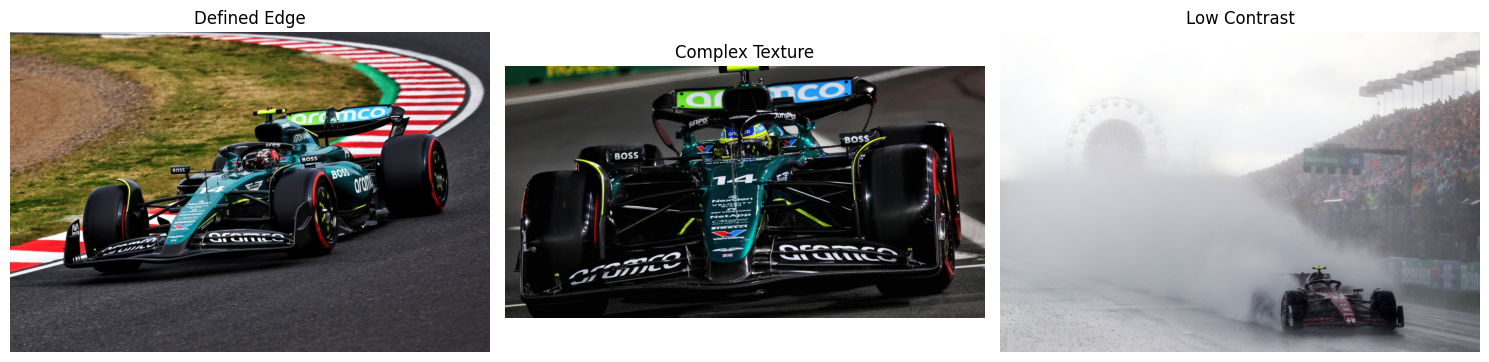

In [83]:
# show_image("Original images", orig)

show_images_row(
    ["Defined Edge", "Complex Texture", "Low Contrast"],
    [images["well_defined"], images["complex_texture"], images["low_contrast"]],
    "original",
    {"type": "default"}, # Placeholder for original hyperparameters
    save_images= False,
    cmap = None # None because they are colored images
)

### Canny 

Is excellent for detecting a wide range of edges while keeping noise at minimum. It is well-known for its strong localization for edges and its ability to surpress false ones, through non-maximum supression and double thresholding.

1. **Noise reduction**:

First, it smoothes the image with a Gaussian filter to reduce the noise:

$$G(x,y) = \frac{1}{2\pi\sigma^2} e^{-\frac{x^2 + y^2}{2\sigma^2}}$$

2. **Gradient Calculation**:

Then, it computes the gradient magnitude and direction:

$$G = \sqrt{G_x^2 + G_y^2}$$
3. **Non-maximum supression**: it thin outs the edges by keeping only the local maxima in the gradient direction.
4. **Double Thresholding**: it classifies the edges as strong or weak, based on two threshold values.
5. **Edge tracking by Hystheresis**: finalize the edge detection by connecting the weak edges to strong ones, if they are contiguous.

Deeper explanation and reference can be found in the [OpenCV documentation](https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html).

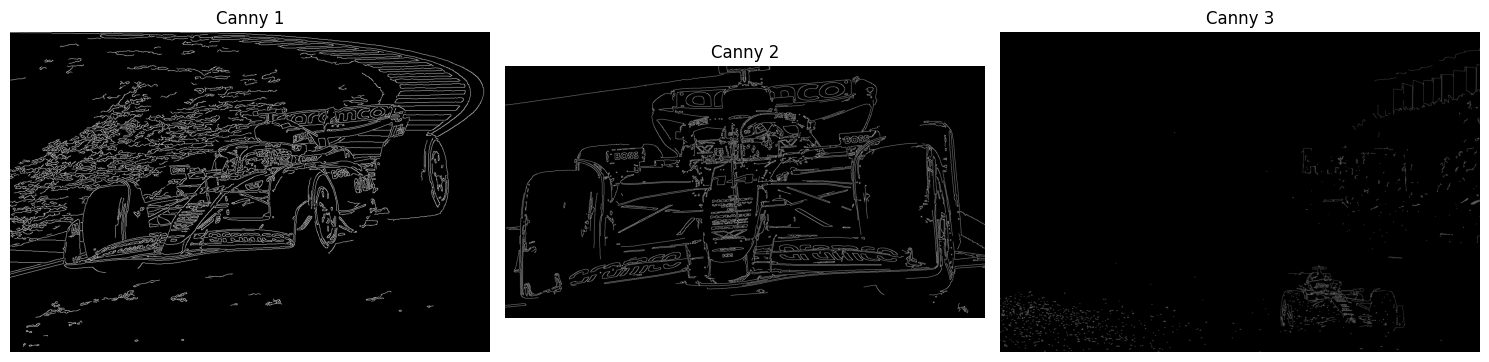

Canny 1 execution time: 0.000999 seconds
Canny 2 execution time: 0.003007 seconds
Canny 3 execution time: 0.013980 seconds


In [84]:
# show_image("Canny", edges_canny, cmap="gray")
show_images_row(
    ["Canny 1", "Canny 2", "Canny 3"],
    [edges_canny1, edges_canny2, edges_canny3],
    "canny",
    canny_params,
    cmap="gray"
)

print(f"Canny 1 execution time: {time_canny1:.6f} seconds")
print(f"Canny 2 execution time: {time_canny2:.6f} seconds")
print(f"Canny 3 execution time: {time_canny3:.6f} seconds")

#### Sobel operator

Is a simple but effective method for approximating the image gradient, being particulary useful when a quick estimation of edge strength and direction is needed. However, it can be more susceptible to noise compared to more advanced techiques like Canny.

1. **Convolution with Sobel Kernels**: it applies two $3x3$ kernels to approximate the derivatives in horizontal and vertical directions.

These kernels are: 
$$
G_x = \begin{bmatrix}
-1 & -2 & -1 \\
 0 &  0 &  0 \\
 1 &  2 &  1
\end{bmatrix}, \quad
G_y = \begin{bmatrix}
-1 &  0 &  1 \\
-2 &  0 &  2 \\
-1 &  0 &  1
\end{bmatrix}
$$

2. **Gradient Magnitude Calculation**: it combines the horizontal and vertial gradients to dtermine edge strength.

$$G = \sqrt{G_x^2 + G_y^2}$$

3. **Edge Direction Calculation**: it determines the orientation of the edge:

$$\theta = arctan\frac{G_y}{G_x}$$


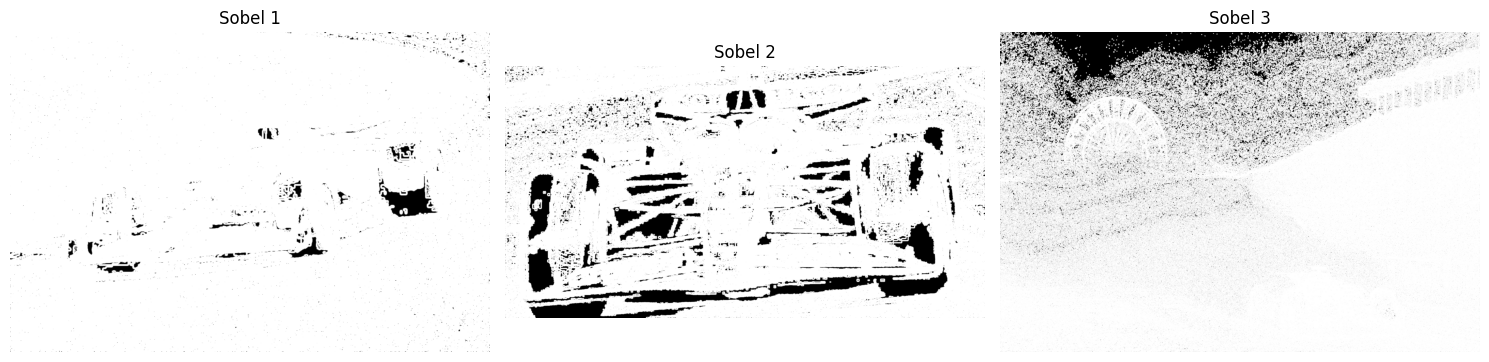

Sobel 1 execution time: 0.017331 seconds
Sobel 2 execution time: 0.027677 seconds
Sobel 3 execution time: 0.175963 seconds


In [85]:
#show_image("Sobel", edges_sobel, cmap="gray")

show_images_row(
    ["Sobel 1", "Sobel 2", "Sobel 3"],
    [edges_sobel1, edges_sobel2, edges_sobel3],
    "sobel",
    sobel_params,
    cmap="gray"
)

print(f"Sobel 1 execution time: {time_sobel1:.6f} seconds")
print(f"Sobel 2 execution time: {time_sobel2:.6f} seconds")
print(f"Sobel 3 execution time: {time_sobel3:.6f} seconds")

#### Laplacian method

The laplacian operator focuses on the second derivative of the image to detect regions with rapid intensity changes. Therefore, it is particulary good for highlighting the details and textures, but can be very sensitive to noise.

1. **Second Derivative Calculation**: computes the Laplacian fo find areas where the intensity changes abruptly.

$$\nabla^2 f = \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2}$$

2. **Common Laplacion Kernel**: then, it uses a $3x3$ kernel to apply the Laplacian operator.
$$
\begin{bmatrix}
0 &  1 &  0 \\
1 &  -4 &  1 \\
0 &  1 &  0
\end{bmatrix}
$$


3. **Zero-Crossings**: it detects edges by identifying where the Laplacian output changes its sign, indicating a transition in intensity.


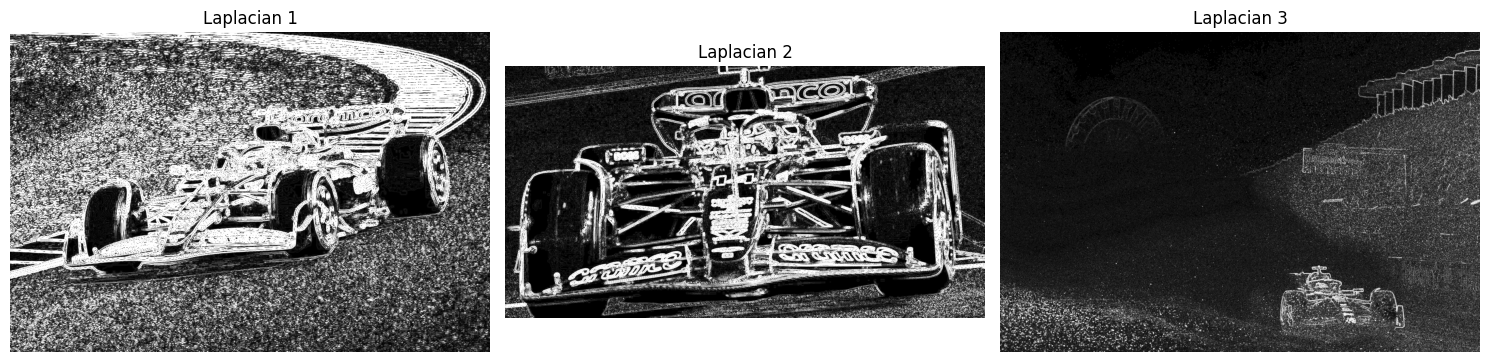

Laplacian 1 execution time: 0.003161 seconds
Laplacian 2 execution time: 0.020044 seconds
Laplacian 3 execution time: 0.082091 seconds


In [86]:
#show_image("Laplacian", edges_laplacian, cmap="gray")
show_images_row(
    ["Laplacian 1", "Laplacian 2", "Laplacian 3"],
    [edges_laplacian1, edges_laplacian2, edges_laplacian3],
    "laplacian",
    laplacian_params,
    cmap="gray"
)

print(f"Laplacian 1 execution time: {time_laplacian1:.6f} seconds")
print(f"Laplacian 2 execution time: {time_laplacian2:.6f} seconds")
print(f"Laplacian 3 execution time: {time_laplacian3:.6f} seconds")

#### Storing the images in directories

For keeping clean folders, I´ll add a final function that stores the images on a different folder depending of their starting name.

In [87]:
def store_images():
    # Bse dir where the processed images are 
    base_dir = "../TASK 1/images/processed"
    
    # Create dirs for every algorithm if they do not exist
    for folder in ["canny", "sobel", "laplacian"]:
        os.makedirs(os.path.join(base_dir, folder), exist_ok=True)
    
    # Pick all images of the base dir
    for filename in os.listdir(base_dir):
        # Check if it is an archive and not a folder
        filepath = os.path.join(base_dir, filename)
        if os.path.isfile(filepath):
            # Move to the respective folder according to the 
            # prefix in the archives
            if filename.startswith("canny_"):
                shutil.move(filepath, os.path.join(base_dir, "canny", filename))
            elif filename.startswith("sobel_"):
                shutil.move(filepath, os.path.join(base_dir, "sobel", filename))
            elif filename.startswith("laplacian_"):
                shutil.move(filepath, os.path.join(base_dir, "laplacian", filename))


In [88]:
store_images()

# Edge Detection Algorithm Analysis

For the labels of the images, see the table below to this cell. The numbers of images are according to the column and method they are from.

---

## Canny Algorithm  
I have identified that the Canny algorithm exhibits distinctive behaviors depending on the chosen hyperparameters:

- **Canny (lower=50, upper=200)**:  
  - Provides excellent edge detection in images with well-defined boundaries (**Image 1**).  

  - Higher thresholds help filter background noise while preserving the main contours of the vehicle and track elements.  

- **Canny (lower=20, upper=120)**:  
  - Ideal for preserving fine details in complex textures (**Images 2 and 3**). 

  - The lower threshold (20) captures subtle gradients, while the reduced upper threshold (120) prevents discarding important edges in medium-contrast conditions.  

--- 

## Laplacian Algorithm (ksize=3 or 5)  
The Laplacian operator with a kernel size of 3 (**Images 1 and 2**) or 5 (**image 3**) achieves an optimal balance between detail detection and noise resistance:

- Small enough to preserve fine details (such as logos and sponsors on the vehicle).  

- Not too small to excessively amplify noise in the image.

- Particularly effective in **Image 2**, where it clearly highlights the structural contours of the vehicle with a "neon" effect, enhancing edge definition.  

- In **Image 3**, some noise is added with kernel size of 5, however, this value is the most balanced. With less kernel sizes, some structures like the Ferris Wheel are not detected.


---

## Sobel Algorithm (ksize=3)  
The Sobel operator with a kernel size of 3 (**Images 1, 2, and 3**) proves to be the most versatile:

- Provides higher precision in detecting fine edges compared to **ksize=5**.  

- Reduces contour blurring, crucial for maintaining the structural integrity of small components.  

- In **Image 6**, this configuration produces an exceptionally sharp representation of the vehicle, highlighting aerodynamic details with high accuracy.  

---

## Performance Comparison by Image Type  

### **Images with Well-Defined Edges:**  

- **Canny (50,200):** Clean and precise detection. 

- **Sobel (ksize=3):** Good retention of details with controlled noise.  

- **Laplacian (ksize=3):** High sensitivity to intensity changes.  

### **Images with Complex Textures:**  

- **Canny (20,120):** Captures structural details without excessive noise.  

- **Sobel (ksize=3):** Excellent representation of technical components.  

- **Laplacian (ksize=3):** High definition of internal contours.  

### **Low-Contrast Images:**  

- **Sobel (ksize=3):** Best performance under challenging conditions.  

- **Canny (20,120):** Higher sensitivity to subtle gradients.  

- **Laplacian (ksize=5):** Detects lots of edges, but adding some noise. In this case, the value depends of wanting to highlight some stuctures like the Ferris Wheel or less noise.

---

# Best images 

---

### Border defined 
|Original|Canny (50,200)|Sobel (k=3)|Laplacian (k=3)|
|:---:|:---:|:---:|:---:|
|![Original 1](images/default/edges.jpg)|![Canny 1](images/processed/canny/canny_Canny_1_lower=50_upper=200.png)|![Sobel 1](images/processed/sobel/sobel_Sobel_1_ksize=3.png)|![Laplacian 1](images/processed/laplacian/laplacian_Laplacian_1_ksize=3.png)|

### Complex texture
|Original|Canny (20,120)|Sobel (k=3)|Laplacian (k=3)|
|:---:|:---:|:---:|:---:|
|![Original 2](images/default/complex.jpg)|![Canny 2](images/processed/canny/canny_Canny_2_lower=20_upper=120.png)|![Sobel 2](images/processed/sobel/sobel_Sobel_2_ksize=3.png)|![Laplacian 2](images/processed/laplacian/laplacian_Laplacian_2_ksize=3.png)|

### Low contrast
|Original|Canny (20,120)|Sobel (k=3)|Laplacian (k=5)|
|:---:|:---:|:---:|:---:|
|![Original 3](images/default/low_contrast.jpg)|![Canny 3](images/processed/canny/canny_Canny_3_lower=20_upper=120.png)|![Sobel 3](images/processed/sobel/sobel_Sobel_3_ksize=3.png)|![Laplacian 3](images/processed/laplacian/laplacian_Laplacian_3_ksize=5.png)|


---

## Conclusion  
Each algorithm has its strengths depending on the type of image:  

- **Canny (50,200)** is the best choice for detecting clear, strong edges.  

- **Canny (20,120)** is ideal for retaining structural details in textured images.  

- **Sobel (ksize=3)** offers the best balance between noise suppression and fine detail detection, making it the most robust option for low-contrast environments.  

- **Laplacian (ksize=3)** excels in highlighting intricate internal details but is more sensitive to noise.  

Optimizing these hyperparameters ensures the best trade-off between significant edge detection and noise suppression for each type of F1 images.  


### Computational Efficiency
Analysis of execution times reveals significant performance differences:

- Canny is the most efficient algorithm (0.002-0.009s), offering excellent speed-to-quality ratio.

- Laplacian shows moderate efficiency (0.008-0.074s), with performance degrading on low-contrast images.

- Sobel has the highest computational cost (0.017-0.160s), particularly in low-contrast scenarios where it takes up to 16x longer than Canny.

These performance differences should be considered when selecting algorithms for real-time applications, with Canny providing the best balance between detection quality and computational efficiency. 

Rapidness for applying this techniques in real world scenarios needs to be taken into account. 